In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
diction = pd.read_csv("train_data_dict.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission_lfbv3c3.csv")

In [3]:
diction

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [4]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [7]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


# Feature Engineering

## Checking for missing values

In [8]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

## Finding the type of missing values mean

In [10]:
print(train['Bed Grade'].mode())
print(train['City_Code_Patient'].mode())

0    2.0
dtype: float64
0    8.0
dtype: float64


In [11]:
print(test['Bed Grade'].mode())
print(test['City_Code_Patient'].mode())

0    2.0
dtype: float64
0    8.0
dtype: float64


## Filling the missing values with mode 

In [12]:
train['Bed Grade'].fillna(2.0,inplace=True)
train['City_Code_Patient'].fillna(8.0,inplace=True)

In [13]:
test['Bed Grade'].fillna(2.0,inplace=True)
test['City_Code_Patient'].fillna(8.0,inplace=True)

In [14]:
train.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

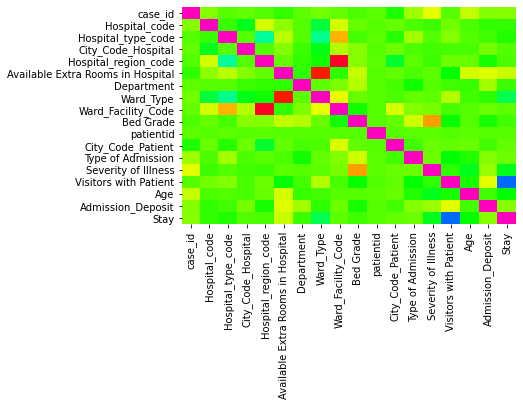

In [53]:
sns.heatmap(train.corr(),cmap='gist_rainbow',cbar=False)

In [15]:
test.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [16]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [17]:
# we will use label encoder for the Department column ward-type ward-facility-code

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['Department'] = enc.fit_transform(np.array(train['Department']).reshape(-1,1))
train['Ward_Type'] = enc.fit_transform(np.array(train['Ward_Type']).reshape(-1,1))
train['Ward_Facility_Code'] = enc.fit_transform(np.array(train['Ward_Facility_Code']).reshape(-1,1))
train['Hospital_region_code'] = enc.fit_transform(np.array(train['Hospital_region_code']).reshape(-1,1))
train['Hospital_type_code'] = enc.fit_transform(np.array(train['Hospital_type_code']).reshape(-1,1))

test['Department'] = enc.fit_transform(np.array(test['Department']).reshape(-1,1))
test['Ward_Type'] = enc.fit_transform(np.array(test['Ward_Type']).reshape(-1,1))
test['Ward_Facility_Code'] = enc.fit_transform(np.array(test['Ward_Facility_Code']).reshape(-1,1))
test['Hospital_region_code'] = enc.fit_transform(np.array(test['Hospital_region_code']).reshape(-1,1))
test['Hospital_type_code'] = enc.fit_transform(np.array(test['Hospital_type_code']).reshape(-1,1))


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [23]:
train['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [26]:
severity_dict = {'Extreme':2,'Moderate':1,'Minor':0}
ad_dict = {'Emergency':3, 'Trauma':2, 'Urgent':1}
age_dict = {'51-60':6, '71-80':8, '31-40':4, '41-50':5, '81-90':9, '61-70':7, '21-30':3,
       '11-20':2, '0-10':1, '91-100':10}

train['Severity of Illness']=train['Severity of Illness'].map(severity_dict)
test['Severity of Illness']=test['Severity of Illness'].map(severity_dict)

train['Type of Admission']=train['Type of Admission'].map(ad_dict)
test['Type of Admission']=test['Type of Admission'].map(ad_dict)

train['Age']=train['Age'].map(age_dict)
test['Age']=test['Age'].map(age_dict)

In [27]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,3,2,2,6,4911.0,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,2,2,2,6,5954.0,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,2,2,2,6,4745.0,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,2,2,2,6,7272.0,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,2,2,2,6,5558.0,41-50


In [30]:
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [31]:
stay_diction = {'0-10':1, '41-50':5, '31-40':4, '11-20':2, '51-60':6, '21-30':3, '71-80':8,
       'More than 100 Days':11, '81-90':9, '61-70':7, '91-100':10}

train['Stay']=train['Stay'].map(stay_diction)

In [32]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,3,2,2,6,4911.0,1
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,2,2,2,6,5954.0,5
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,2,2,2,6,4745.0,4
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,2,2,2,6,7272.0,5
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,2,2,2,6,5558.0,5


In [33]:
X = train.drop(['Stay'],axis=1)
y=train['Stay']

In [40]:
# splitting the data and training and submitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=7)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.27825505704172593


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
from sklearn.ensemble import 
lr = AdaBoostClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.3773905709556003


In [47]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.4053573911990202


In [54]:
from lightgbm import LGBMClassifier
lr = LGBMClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.4204219697003683


In [56]:
# submitting the file
sub.drop(['Stay'],axis=1)
sub['Stay'] = lr.predict(test)

sub_remap = { 1:'0-10', 5:'41-50', 4:'31-40', 2:'11-20', 6:'51-60', 3:'21-30', 8:'71-80',
       11:'More than 100 Days', 9:'81-90', 7:'61-70', 10:'91-100'}
sub['Stay']=sub['Stay'].map(sub_remap)
sub.to_csv('lgbm-sub.csv',index=False)

In [57]:
from catboost import CatBoostClassifier
lr = CatBoostClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

Learning rate set to 0.099841
0:	learn: 2.2314347	total: 393ms	remaining: 6m 32s
1:	learn: 2.1170959	total: 584ms	remaining: 4m 51s
2:	learn: 2.0326922	total: 724ms	remaining: 4m
3:	learn: 1.9674778	total: 861ms	remaining: 3m 34s
4:	learn: 1.9139382	total: 992ms	remaining: 3m 17s
5:	learn: 1.8691816	total: 1.13s	remaining: 3m 7s
6:	learn: 1.8311294	total: 1.27s	remaining: 2m 59s
7:	learn: 1.7974473	total: 1.41s	remaining: 2m 54s
8:	learn: 1.7695737	total: 1.54s	remaining: 2m 49s
9:	learn: 1.7470698	total: 1.67s	remaining: 2m 45s
10:	learn: 1.7261992	total: 1.88s	remaining: 2m 49s
11:	learn: 1.7108059	total: 2.03s	remaining: 2m 47s
12:	learn: 1.6945601	total: 2.18s	remaining: 2m 45s
13:	learn: 1.6805925	total: 2.35s	remaining: 2m 45s
14:	learn: 1.6704840	total: 2.5s	remaining: 2m 43s
15:	learn: 1.6602829	total: 2.64s	remaining: 2m 42s
16:	learn: 1.6507527	total: 2.77s	remaining: 2m 40s
17:	learn: 1.6422421	total: 2.9s	remaining: 2m 38s
18:	learn: 1.6356241	total: 3.04s	remaining: 2m 36s

158:	learn: 1.4934530	total: 21.6s	remaining: 1m 54s
159:	learn: 1.4929083	total: 21.7s	remaining: 1m 54s
160:	learn: 1.4922932	total: 21.9s	remaining: 1m 53s
161:	learn: 1.4919198	total: 22s	remaining: 1m 53s
162:	learn: 1.4914169	total: 22.1s	remaining: 1m 53s
163:	learn: 1.4910860	total: 22.3s	remaining: 1m 53s
164:	learn: 1.4905145	total: 22.4s	remaining: 1m 53s
165:	learn: 1.4901887	total: 22.6s	remaining: 1m 53s
166:	learn: 1.4897184	total: 22.7s	remaining: 1m 53s
167:	learn: 1.4892241	total: 22.8s	remaining: 1m 53s
168:	learn: 1.4889935	total: 23s	remaining: 1m 52s
169:	learn: 1.4887340	total: 23.1s	remaining: 1m 52s
170:	learn: 1.4882880	total: 23.2s	remaining: 1m 52s
171:	learn: 1.4879538	total: 23.4s	remaining: 1m 52s
172:	learn: 1.4876733	total: 23.5s	remaining: 1m 52s
173:	learn: 1.4871801	total: 23.6s	remaining: 1m 52s
174:	learn: 1.4868782	total: 23.8s	remaining: 1m 52s
175:	learn: 1.4866430	total: 23.9s	remaining: 1m 51s
176:	learn: 1.4864775	total: 24s	remaining: 1m 51s

315:	learn: 1.4468053	total: 43s	remaining: 1m 33s
316:	learn: 1.4465254	total: 43.1s	remaining: 1m 32s
317:	learn: 1.4463866	total: 43.3s	remaining: 1m 32s
318:	learn: 1.4461290	total: 43.5s	remaining: 1m 32s
319:	learn: 1.4458471	total: 43.6s	remaining: 1m 32s
320:	learn: 1.4456543	total: 43.8s	remaining: 1m 32s
321:	learn: 1.4453504	total: 44s	remaining: 1m 32s
322:	learn: 1.4450834	total: 44.1s	remaining: 1m 32s
323:	learn: 1.4448578	total: 44.3s	remaining: 1m 32s
324:	learn: 1.4445990	total: 44.5s	remaining: 1m 32s
325:	learn: 1.4443503	total: 44.6s	remaining: 1m 32s
326:	learn: 1.4441710	total: 44.8s	remaining: 1m 32s
327:	learn: 1.4439246	total: 45s	remaining: 1m 32s
328:	learn: 1.4437298	total: 45.1s	remaining: 1m 32s
329:	learn: 1.4434734	total: 45.3s	remaining: 1m 31s
330:	learn: 1.4431551	total: 45.4s	remaining: 1m 31s
331:	learn: 1.4430303	total: 45.6s	remaining: 1m 31s
332:	learn: 1.4428591	total: 45.7s	remaining: 1m 31s
333:	learn: 1.4427564	total: 45.9s	remaining: 1m 31s

472:	learn: 1.4112175	total: 1m 4s	remaining: 1m 12s
473:	learn: 1.4109239	total: 1m 4s	remaining: 1m 11s
474:	learn: 1.4106674	total: 1m 4s	remaining: 1m 11s
475:	learn: 1.4104736	total: 1m 5s	remaining: 1m 11s
476:	learn: 1.4102968	total: 1m 5s	remaining: 1m 11s
477:	learn: 1.4101208	total: 1m 5s	remaining: 1m 11s
478:	learn: 1.4098102	total: 1m 5s	remaining: 1m 11s
479:	learn: 1.4096268	total: 1m 5s	remaining: 1m 11s
480:	learn: 1.4093893	total: 1m 5s	remaining: 1m 10s
481:	learn: 1.4091710	total: 1m 5s	remaining: 1m 10s
482:	learn: 1.4090446	total: 1m 6s	remaining: 1m 10s
483:	learn: 1.4087279	total: 1m 6s	remaining: 1m 10s
484:	learn: 1.4084825	total: 1m 6s	remaining: 1m 10s
485:	learn: 1.4082692	total: 1m 6s	remaining: 1m 10s
486:	learn: 1.4080953	total: 1m 6s	remaining: 1m 10s
487:	learn: 1.4078307	total: 1m 6s	remaining: 1m 10s
488:	learn: 1.4077090	total: 1m 6s	remaining: 1m 9s
489:	learn: 1.4075146	total: 1m 7s	remaining: 1m 9s
490:	learn: 1.4072747	total: 1m 7s	remaining: 1m

629:	learn: 1.3779903	total: 1m 26s	remaining: 51.1s
630:	learn: 1.3777059	total: 1m 27s	remaining: 50.9s
631:	learn: 1.3774772	total: 1m 27s	remaining: 50.8s
632:	learn: 1.3773098	total: 1m 27s	remaining: 50.7s
633:	learn: 1.3771027	total: 1m 27s	remaining: 50.5s
634:	learn: 1.3769553	total: 1m 27s	remaining: 50.4s
635:	learn: 1.3767220	total: 1m 27s	remaining: 50.2s
636:	learn: 1.3765609	total: 1m 27s	remaining: 50.1s
637:	learn: 1.3763300	total: 1m 28s	remaining: 50s
638:	learn: 1.3761715	total: 1m 28s	remaining: 49.8s
639:	learn: 1.3759412	total: 1m 28s	remaining: 49.7s
640:	learn: 1.3756603	total: 1m 28s	remaining: 49.5s
641:	learn: 1.3755356	total: 1m 28s	remaining: 49.4s
642:	learn: 1.3753104	total: 1m 28s	remaining: 49.3s
643:	learn: 1.3749177	total: 1m 28s	remaining: 49.1s
644:	learn: 1.3747099	total: 1m 28s	remaining: 49s
645:	learn: 1.3745025	total: 1m 29s	remaining: 48.9s
646:	learn: 1.3741678	total: 1m 29s	remaining: 48.7s
647:	learn: 1.3739700	total: 1m 29s	remaining: 48.

785:	learn: 1.3470412	total: 1m 48s	remaining: 29.5s
786:	learn: 1.3468755	total: 1m 48s	remaining: 29.4s
787:	learn: 1.3466612	total: 1m 48s	remaining: 29.3s
788:	learn: 1.3464301	total: 1m 48s	remaining: 29.1s
789:	learn: 1.3462605	total: 1m 49s	remaining: 29s
790:	learn: 1.3460484	total: 1m 49s	remaining: 28.9s
791:	learn: 1.3458582	total: 1m 49s	remaining: 28.7s
792:	learn: 1.3456862	total: 1m 49s	remaining: 28.6s
793:	learn: 1.3454285	total: 1m 49s	remaining: 28.4s
794:	learn: 1.3452651	total: 1m 49s	remaining: 28.3s
795:	learn: 1.3450919	total: 1m 49s	remaining: 28.2s
796:	learn: 1.3448840	total: 1m 50s	remaining: 28s
797:	learn: 1.3447228	total: 1m 50s	remaining: 27.9s
798:	learn: 1.3445645	total: 1m 50s	remaining: 27.7s
799:	learn: 1.3442726	total: 1m 50s	remaining: 27.6s
800:	learn: 1.3440628	total: 1m 50s	remaining: 27.5s
801:	learn: 1.3439359	total: 1m 50s	remaining: 27.3s
802:	learn: 1.3437338	total: 1m 50s	remaining: 27.2s
803:	learn: 1.3435586	total: 1m 51s	remaining: 27.

942:	learn: 1.3168072	total: 2m 10s	remaining: 7.89s
943:	learn: 1.3166419	total: 2m 10s	remaining: 7.75s
944:	learn: 1.3163962	total: 2m 10s	remaining: 7.61s
945:	learn: 1.3162572	total: 2m 10s	remaining: 7.47s
946:	learn: 1.3161308	total: 2m 11s	remaining: 7.34s
947:	learn: 1.3159171	total: 2m 11s	remaining: 7.2s
948:	learn: 1.3157369	total: 2m 11s	remaining: 7.06s
949:	learn: 1.3154443	total: 2m 11s	remaining: 6.92s
950:	learn: 1.3152624	total: 2m 11s	remaining: 6.78s
951:	learn: 1.3151242	total: 2m 11s	remaining: 6.64s
952:	learn: 1.3149483	total: 2m 11s	remaining: 6.51s
953:	learn: 1.3147797	total: 2m 12s	remaining: 6.37s
954:	learn: 1.3146185	total: 2m 12s	remaining: 6.23s
955:	learn: 1.3144715	total: 2m 12s	remaining: 6.09s
956:	learn: 1.3142445	total: 2m 12s	remaining: 5.95s
957:	learn: 1.3141412	total: 2m 12s	remaining: 5.81s
958:	learn: 1.3139377	total: 2m 12s	remaining: 5.67s
959:	learn: 1.3138409	total: 2m 12s	remaining: 5.54s
960:	learn: 1.3137549	total: 2m 13s	remaining: 

In [58]:
# submitting the file
sub.drop(['Stay'],axis=1)
sub['Stay'] = lr.predict(test)

sub_remap = { 1:'0-10', 5:'41-50', 4:'31-40', 2:'11-20', 6:'51-60', 3:'21-30', 8:'71-80',
       11:'More than 100 Days', 9:'81-90', 7:'61-70', 10:'91-100'}
sub['Stay']=sub['Stay'].map(sub_remap)
sub.to_csv('catboost-sub.csv',index=False)

In [59]:
from xgboost import XGBClassifier
lr = XGBClassifier()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.4165189967116331


In [60]:
# submitting the file
sub.drop(['Stay'],axis=1)
sub['Stay'] = lr.predict(test)

sub_remap = { 1:'0-10', 5:'41-50', 4:'31-40', 2:'11-20', 6:'51-60', 3:'21-30', 8:'71-80',
       11:'More than 100 Days', 9:'81-90', 7:'61-70', 10:'91-100'}
sub['Stay']=sub['Stay'].map(sub_remap)
sub.to_csv('xgb-sub.csv',index=False)